### Import packages and load dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:

pd.set_option('display.width', 1000)  # Expands display width
pd.set_option('display.max_columns', None)  # Ensures all columns are displayed

# Load the dataset
steel_df = pd.read_csv('_data/Steel_industry_data.csv')

# Preview the data
print(steel_df.head())
print(steel_df.info())

               date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM WeekStatus Day_of_week   Load_Type
0  01/01/2018 00:15       3.17                                  2.95                                   0.0        0.0                         73.21                         100.0   900    Weekday      Monday  Light_Load
1  01/01/2018 00:30       4.00                                  4.46                                   0.0        0.0                         66.77                         100.0  1800    Weekday      Monday  Light_Load
2  01/01/2018 00:45       3.24                                  3.28                                   0.0        0.0                         70.28                         100.0  2700    Weekday      Monday  Light_Load
3  01/01/2018 01:00       3.31                                  3.56                                   0.0        0.0       

### Explore the dataset structure

In [23]:
# Check basic statistics
print(steel_df.describe())

# Check unique values in categorical columns
print("Date types:", steel_df['date'].nunique())
print("Load types:", steel_df['Load_Type'].nunique())
print("Day of week types:", steel_df['Day_of_week'].nunique())

          Usage_kWh  Lagging_Current_Reactive.Power_kVarh  Leading_Current_Reactive_Power_kVarh     CO2(tCO2)  Lagging_Current_Power_Factor  Leading_Current_Power_Factor           NSM
count  35040.000000                          35040.000000                          35040.000000  35040.000000                  35040.000000                  35040.000000  35040.000000
mean      27.386892                             13.035384                              3.870949      0.011524                     80.578056                     84.367870  42750.000000
std       33.444380                             16.306000                              7.424463      0.016151                     18.921322                     30.456535  24940.534317
min        0.000000                              0.000000                              0.000000      0.000000                      0.000000                      0.000000      0.000000
25%        3.200000                              2.300000                       

### Analyze energy consumption patterns

      Load_Type  Usage_kWh
0    Light_Load  155892.81
1  Maximum_Load  430977.36
2   Medium_Load  372766.54


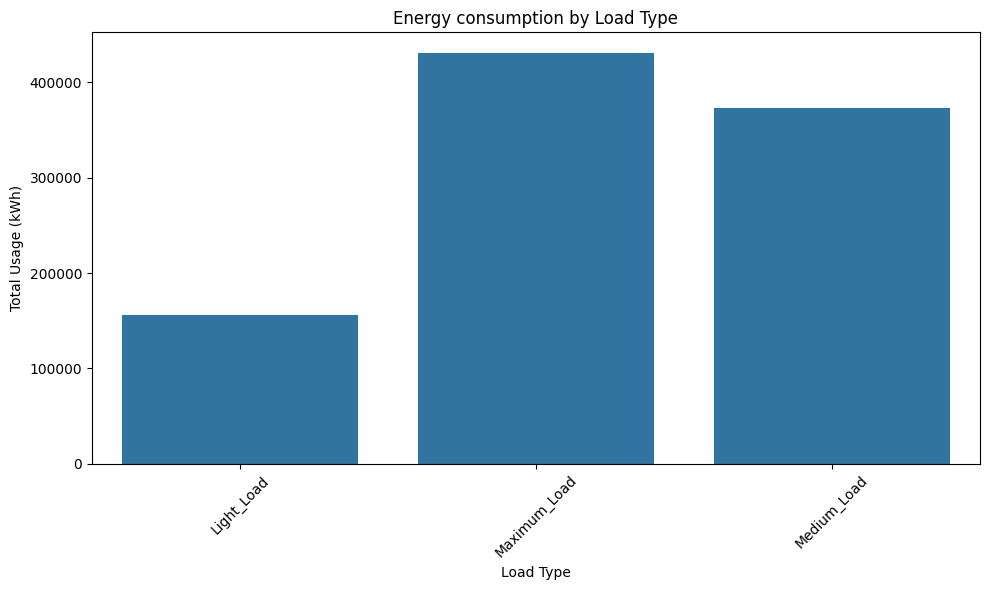

In [51]:
# Convert date to datetime
steel_df['date'] = pd.to_datetime(steel_df['date'], format="%d/%m/%Y %H:%M")
steel_df['month'] = steel_df['date'].dt.month
steel_df['hour'] = steel_df['date'].dt.hour

# Analyze usage by load type
load_type_consumption = steel_df.groupby('Load_Type')[['Usage_kWh']].sum().reset_index()
print(load_type_consumption)

# Plot energy usage by load type
plt.figure(figsize=(10, 6))
sns.barplot(x='Load_Type', y='Usage_kWh', data=load_type_consumption)
plt.title('Energy consumption by Load Type')
plt.ylabel('Total Usage (kWh)')
plt.xlabel('Load Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### Analyze energy consumption patterns over time

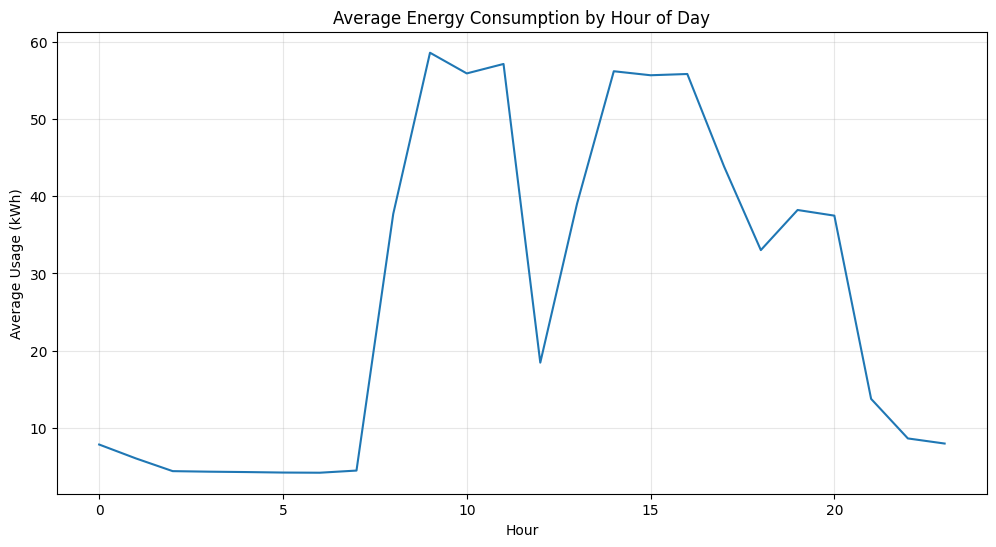

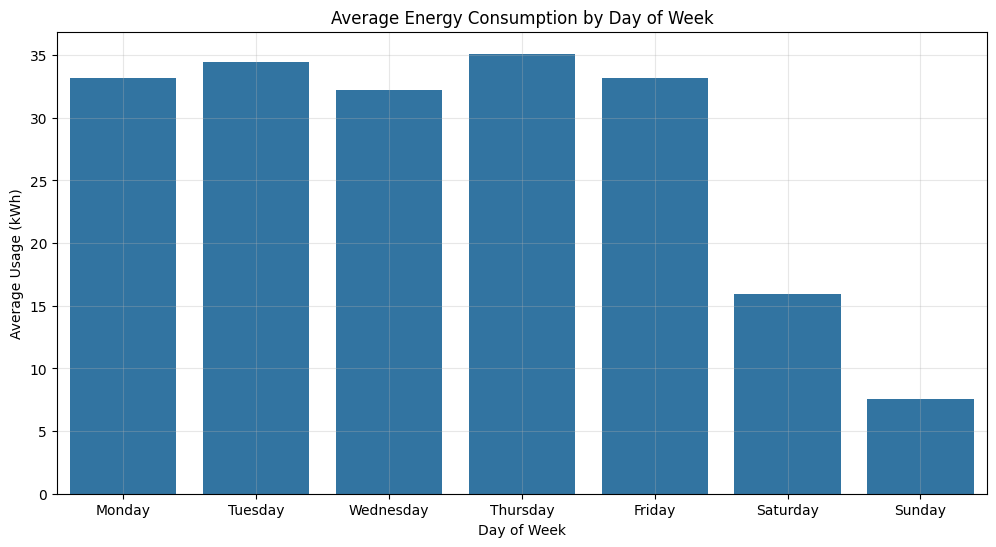

In [63]:
# Average consumption by hour of day
hourly_consumption = steel_df.groupby('hour')['Usage_kWh'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='Usage_kWh', data=hourly_consumption)
plt.title('Average Energy Consumption by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average Usage (kWh)')
plt.grid(True, alpha=0.3)
plt.show()

# Average consumption by day of week
weekly_consumption = steel_df.groupby('Day_of_week')[['Usage_kWh']].mean().reset_index()
# Reorder days correctly
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_consumption['Day_of_week'] = pd.Categorical(weekly_consumption['Day_of_week'], categories=day_order, ordered=True)
weekly_consumption = weekly_consumption.sort_values('Day_of_week')

plt.figure(figsize=(12, 6))
sns.barplot(x='Day_of_week', y='Usage_kWh', data=weekly_consumption)
plt.title('Average Energy Consumption by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Usage (kWh)')
plt.grid(True, alpha=0.3)
plt.show()

### Analyze the correlation between energy consumption and other factors

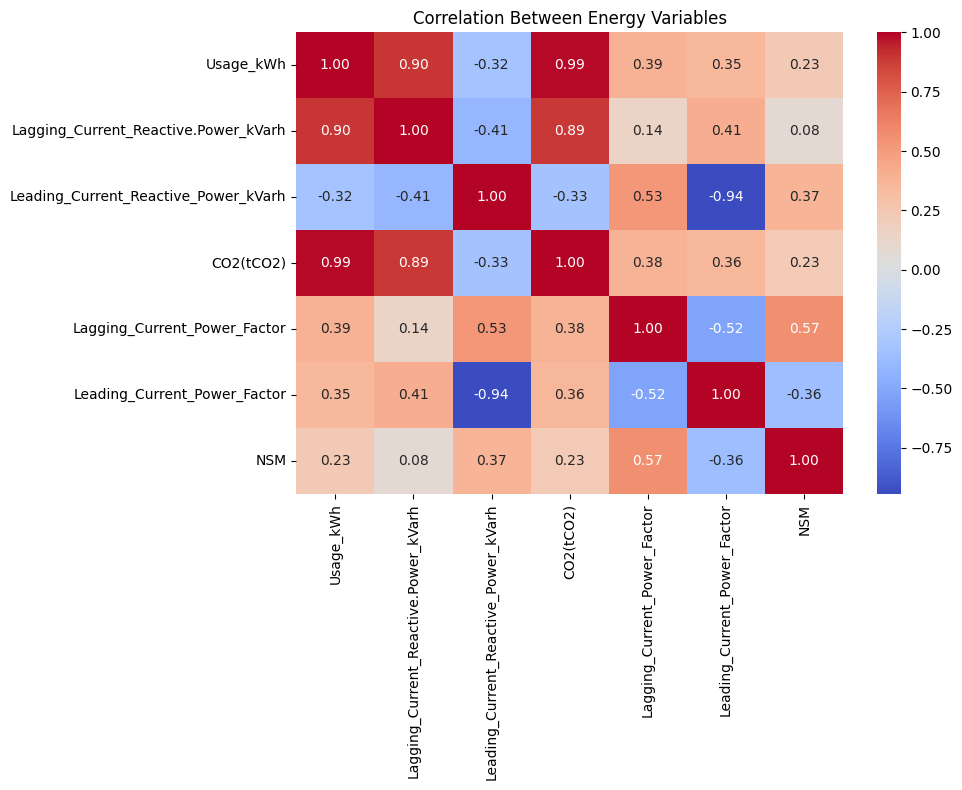

In [67]:
# Select numerical columns
numerical_cols = ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']

# Create correlation matrix
corr_matrix = steel_df[numerical_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Energy Variables')
plt.tight_layout()
plt.show()

### What is the average energy consumption during weekdays vs weekends?

In [70]:
# Create weekend flag
steel_df['is_weekend'] = steel_df['Day_of_week'].isin(['Saturday', 'Sunday'])
weekend_comparison = steel_df.groupby('is_weekend')[['Usage_kWh']].mean().reset_index()

print(weekend_comparison)

   is_weekend  Usage_kWh
0       False  33.624727
1        True  11.732327


### Which month has the highest energy consumption?

In [73]:
monthly_consumption = steel_df.groupby('month')[['Usage_kWh']].sum().reset_index()
highest_month = monthly_consumption.loc[monthly_consumption['Usage_kWh'].idxmax()]
print(f"Month with highest consumption: {highest_month['month']}, Usage: {highest_month['Usage_kWh']: .2f} kWh")

Month with highest consumption: 1.0, Usage:  126238.29 kWh


### Which load type has the highest CO2 emissions per KWh used?

In [75]:
emissions_efficiency = steel_df.groupby('Load_Type')['CO2(tCO2)'].apply(lambda x: x.sum()).sort_values(ascending=False)
print(emissions_efficiency)

Load_Type
Maximum_Load    195.61
Medium_Load     162.05
Light_Load       46.15
Name: CO2(tCO2), dtype: float64
